In [43]:
#data preparation

import pandas as pd 
import numpy as np 


#import nltk for natural language toolkit
import nltk 
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
from nltk.corpus import stopwords

# Import tweepy to work with the twitter API
import tweepy as tw


#import string, regex, , uniqcode
import re, string, unicodedata

#import sklearn preprocessing 
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

#import sklearn for modeling
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#import sklearn for model evaluation 
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#import visualization module 
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

#import tqdm 
from tqdm import tqdm 
tqdm.pandas()

#import beaurtiful soup 
from bs4 import BeautifulSoup

#save model 
import pickle 

# Import stopwords
import nltk
from nltk.corpus import stopwords

# Import textblob
from textblob import Word, TextBlob

import copy

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [44]:
!pip install newsapi-python

In [45]:
#dataset from newsapi.org
import requests
API_URL = 'https://newsapi.org/v2/everything'
api_key = '8ID4fpEZ8QOxpLwilrPxG9vkH'
consumer_secret = 'ywUz3bEXE8ocJtbDFUpLpGWCtv4ztKvMbuncfVd8SHdFIvBd9o'
access_token = '1271630462901825536-680xQijkQMm614Va4U2dpGoOGBzSpS'
access_token_secret = '7ZpvnsUzsJjN4wl0awrrtUcxjp2JnmbknO3r2txDtptuo'

def extract_data(q,language,pageSize):
    #define the parameter that are needed
    data = {'q': q,
           'language': language ,
#            'domain':domain,
            'pageSize': pageSize,
           'apiKey': api_key}
    
    #call the api and store into json format
    response = requests.get(API_URL, data)
    data = response.json()
    
    data = pd.DataFrame(data['articles'])
    
        
    # store into dataframe
#     df = pd.DataFrame.from_dict(data, orient='index')
    return data

In [46]:
# Authenticate
auth = tw.OAuthHandler(api_key, consumer_secret)
# Set Tokens
auth.set_access_token(access_token, access_token_secret)
# Instantiate API
api = tw.API(auth, wait_on_rate_limit=True)

In [47]:
hashtag = '#presidentialdebate'
query = tw.Cursor(api.search, q=hashtag).items(1000)
tweets = [{'Tweets':tweet.text, 'Timestamp':tweet.created_at} for tweet in query]
print(tweets)

[{'Tweets': '@GraceyV6 @WBrettWilson @USAGov @DonaldTrump @realDonaldTrump @JoeBiden @POTUS (3/)\n- #Russian bounties put on… https://t.co/7QCCtylmTU', 'Timestamp': datetime.datetime(2021, 1, 28, 11, 49, 49)}, {'Tweets': 'RT @WSjp_insight: 3rd US #PresidentialDebate articles https://t.co/64dClOHu2m BerkeleyISchool Center4Politics YouGovUS KelloggSchool cage_w…', 'Timestamp': datetime.datetime(2021, 1, 28, 8, 56, 32)}, {'Tweets': 'RT @Matthewcogdeill: Speaking of what Joe Biden said to My fellow Military Men &amp; Women\n\n@JoeBiden said "Clap for that you stupid bastards"…', 'Timestamp': datetime.datetime(2021, 1, 27, 16, 0, 41)}, {'Tweets': 'RT @WSjp_insight: 1st US #PresidentialDebate 09/29/2020\n🇺🇸#Debates2020 #TrumpBidenDebate\nhttps://t.co/DfBnubTidB\nPBS,NewsHour CBSNews NBCPo…', 'Timestamp': datetime.datetime(2021, 1, 27, 8, 28, 43)}, {'Tweets': 'RT @WSjp_insight: 2nd US #PresidentialDebate articles https://t.co/3uiHbyyVnD WUSTL bpolitics TPM nprpolitics HuffPostPol thedailybeas

In [48]:
df = pd.DataFrame.from_dict(tweets)
df.head()

,Tweets,Timestamp
0,@GraceyV6 @WBrettWilson @USAGov @DonaldTrump @...,2021-01-28 11:49:49
1,RT @WSjp_insight: 3rd US #PresidentialDebate a...,2021-01-28 08:56:32
2,RT @Matthewcogdeill: Speaking of what Joe Bide...,2021-01-27 16:00:41
3,RT @WSjp_insight: 1st US #PresidentialDebate 0...,2021-01-27 08:28:43
4,RT @WSjp_insight: 2nd US #PresidentialDebate a...,2021-01-27 08:20:27


In [49]:
df.tail()

,Tweets,Timestamp
51,RT @mishacollins: This photo was taken moments...,2021-01-21 00:17:27
52,#VoteBlueToEndThisNightmare #VoteBidenHarris #...,2021-01-20 22:14:56
53,RT @SteveCruz142: You now start a chance of ma...,2021-01-20 17:52:45
54,RT @IGotTehJuice: Sleepy Joe didn't sleep for ...,2021-01-20 17:41:24
55,Check out Jimmy Kimmel’s cold open at 1:07 min...,2021-01-20 14:22:53


In [50]:
trump_handle = ['DonaldTrump', 'Donald Trump', 'Donald', 'Trump', 'Trump\'s']
biden_handle = ['JoeBiden', 'Joe Biden', 'Joe', 'Biden', 'Biden\'s']

In [51]:
def identify_subject(tweet, refs):
    flag = 0 
    for ref in refs:
        if tweet.find(ref) != -1:
            flag = 1
    return flag

df['Trump'] = df['Tweets'].apply(lambda x: identify_subject(x, trump_handle)) 
df['Biden'] = df['Tweets'].apply(lambda x: identify_subject(x, biden_handle))
df.head(10)

,Tweets,Timestamp,Trump,Biden
0,@GraceyV6 @WBrettWilson @USAGov @DonaldTrump @...,2021-01-28 11:49:49,1,1
1,RT @WSjp_insight: 3rd US #PresidentialDebate a...,2021-01-28 08:56:32,0,0
2,RT @Matthewcogdeill: Speaking of what Joe Bide...,2021-01-27 16:00:41,0,1
3,RT @WSjp_insight: 1st US #PresidentialDebate 0...,2021-01-27 08:28:43,1,1
4,RT @WSjp_insight: 2nd US #PresidentialDebate a...,2021-01-27 08:20:27,0,0
5,RT @WSjp_insight: Final(2nd)US🇺🇸#PresidentialD...,2021-01-27 06:39:32,0,0
6,RT @jksmith06: @realDonaldTrump @POTUS #Presid...,2021-01-27 05:23:36,1,0
7,(1) Watching a rerun of the #first 2016 #presi...,2021-01-26 18:22:39,0,0
8,https://t.co/ySA4U7drZ0\n\nWish his policies w...,2021-01-26 17:51:59,0,0
9,RT @WSjp_insight: Final(2nd)US🇺🇸#PresidentialD...,2021-01-26 13:22:15,0,0


In [52]:
df[df['Trump']==1]

,Tweets,Timestamp,Trump,Biden
0,@GraceyV6 @WBrettWilson @USAGov @DonaldTrump @...,2021-01-28 11:49:49,1,1
3,RT @WSjp_insight: 1st US #PresidentialDebate 0...,2021-01-27 08:28:43,1,1
6,RT @jksmith06: @realDonaldTrump @POTUS #Presid...,2021-01-27 05:23:36,1,0
23,RT @Dncdesantis: My prediction on tonight's #P...,2021-01-24 19:05:49,1,0
35,RT @WSjp_insight: 1st US #PresidentialDebate 0...,2021-01-23 11:55:25,1,1
43,RT @SpencerKarter: #FakePresident #Drumpf aka ...,2021-01-22 02:09:32,1,0
44,RT @SpencerKarter: #FakePresident #Drumpf aka ...,2021-01-22 02:09:31,1,0
45,RT @SpencerKarter: More of #DonaldTrump's #Dam...,2021-01-22 02:06:46,1,0
46,RT @SpencerKarter: More of #DonaldTrump's #Dam...,2021-01-22 02:03:28,1,0
50,RT @NihilisticGOP: Not entirely sure I underst...,2021-01-21 11:14:09,1,0


In [53]:
df[df['Biden']==1]

,Tweets,Timestamp,Trump,Biden
0,@GraceyV6 @WBrettWilson @USAGov @DonaldTrump @...,2021-01-28 11:49:49,1,1
2,RT @Matthewcogdeill: Speaking of what Joe Bide...,2021-01-27 16:00:41,0,1
3,RT @WSjp_insight: 1st US #PresidentialDebate 0...,2021-01-27 08:28:43,1,1
18,RT @NotTherealist: #BidenBingo who’s with me? ...,2021-01-25 02:27:14,0,1
20,RT @Matthewcogdeill: Speaking of what Joe Bide...,2021-01-24 20:24:59,0,1
21,RT @Matthewcogdeill: Speaking of what Joe Bide...,2021-01-24 20:16:04,0,1
22,RT @Matthewcogdeill: Speaking of what Joe Bide...,2021-01-24 20:15:33,0,1
26,RT @RandPaul: Is this the part where @JoeBiden...,2021-01-24 10:04:35,0,1
28,RT @Matthewcogdeill: Speaking of what Joe Bide...,2021-01-24 00:35:25,0,1
29,RT @Matthewcogdeill: Speaking of what Joe Bide...,2021-01-24 00:24:34,0,1


In [54]:
nltk.download('stopwords')
nltk.download('wordnet')
stop_words = stopwords.words('english')
custom_stopwords = ['RT', '#PresidentialDebate']

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [55]:
def preprocess_tweets(tweet, custom_stopwords):
    processed_tweet = tweet
    processed_tweet.replace('[^\w\s]', '')
    processed_tweet = " ".join(word for word in processed_tweet.split() if word not in stop_words)
    processed_tweet = " ".join(word for word in processed_tweet.split() if word not in custom_stopwords)
    processed_tweet = " ".join(Word(word).lemmatize() for word in processed_tweet.split())
    return(processed_tweet)

df['Processed Tweet'] = df['Tweets'].apply(lambda x: preprocess_tweets(x, custom_stopwords))
df.head()

,Tweets,Timestamp,Trump,Biden,Processed Tweet
0,@GraceyV6 @WBrettWilson @USAGov @DonaldTrump @...,2021-01-28 11:49:49,1,1,@GraceyV6 @WBrettWilson @USAGov @DonaldTrump @...
1,RT @WSjp_insight: 3rd US #PresidentialDebate a...,2021-01-28 08:56:32,0,0,@WSjp_insight: 3rd US article https://t.co/64d...
2,RT @Matthewcogdeill: Speaking of what Joe Bide...,2021-01-27 16:00:41,0,1,@Matthewcogdeill: Speaking Joe Biden said My f...
3,RT @WSjp_insight: 1st US #PresidentialDebate 0...,2021-01-27 08:28:43,1,1,@WSjp_insight: 1st US 09/29/2020 🇺🇸#Debates202...
4,RT @WSjp_insight: 2nd US #PresidentialDebate a...,2021-01-27 08:20:27,0,0,@WSjp_insight: 2nd US article https://t.co/3ui...


In [56]:
# Calculate polarity
df['polarity'] = df['Processed Tweet'].apply(lambda x: TextBlob(x).sentiment[0])
df['subjectivity'] = df['Processed Tweet'].apply(lambda x: TextBlob(x).sentiment[1])

In [57]:
df.head()

,Tweets,Timestamp,Trump,Biden,Processed Tweet,polarity,subjectivity
0,@GraceyV6 @WBrettWilson @USAGov @DonaldTrump @...,2021-01-28 11:49:49,1,1,@GraceyV6 @WBrettWilson @USAGov @DonaldTrump @...,0.00,0.00
1,RT @WSjp_insight: 3rd US #PresidentialDebate a...,2021-01-28 08:56:32,0,0,@WSjp_insight: 3rd US article https://t.co/64d...,0.00,0.00
2,RT @Matthewcogdeill: Speaking of what Joe Bide...,2021-01-27 16:00:41,0,1,@Matthewcogdeill: Speaking Joe Biden said My f...,-0.45,0.55
3,RT @WSjp_insight: 1st US #PresidentialDebate 0...,2021-01-27 08:28:43,1,1,@WSjp_insight: 1st US 09/29/2020 🇺🇸#Debates202...,0.00,0.00
4,RT @WSjp_insight: 2nd US #PresidentialDebate a...,2021-01-27 08:20:27,0,0,@WSjp_insight: 2nd US article https://t.co/3ui...,0.00,0.00


In [58]:
# lower casing
df['Processed Tweet'] = df['Processed Tweet'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df.head(10)

,Tweets,Timestamp,Trump,Biden,Processed Tweet,polarity,subjectivity
0,@GraceyV6 @WBrettWilson @USAGov @DonaldTrump @...,2021-01-28 11:49:49,1,1,@graceyv6 @wbrettwilson @usagov @donaldtrump @...,0.000000,0.000000
1,RT @WSjp_insight: 3rd US #PresidentialDebate a...,2021-01-28 08:56:32,0,0,@wsjp_insight: 3rd us article https://t.co/64d...,0.000000,0.000000
2,RT @Matthewcogdeill: Speaking of what Joe Bide...,2021-01-27 16:00:41,0,1,@matthewcogdeill: speaking joe biden said my f...,-0.450000,0.550000
3,RT @WSjp_insight: 1st US #PresidentialDebate 0...,2021-01-27 08:28:43,1,1,@wsjp_insight: 1st us 09/29/2020 🇺🇸#debates202...,0.000000,0.000000
4,RT @WSjp_insight: 2nd US #PresidentialDebate a...,2021-01-27 08:20:27,0,0,@wsjp_insight: 2nd us article https://t.co/3ui...,0.000000,0.000000
5,RT @WSjp_insight: Final(2nd)US🇺🇸#PresidentialD...,2021-01-27 06:39:32,0,0,@wsjp_insight: final(2nd)us🇺🇸#presidentialdeba...,0.000000,0.000000
6,RT @jksmith06: @realDonaldTrump @POTUS #Presid...,2021-01-27 05:23:36,1,0,@jksmith06: @realdonaldtrump @potus at least i...,-0.300000,0.400000
7,(1) Watching a rerun of the #first 2016 #presi...,2021-01-26 18:22:39,0,0,(1) watching rerun #first 2016 #presidentialde...,0.250000,0.333333
8,https://t.co/ySA4U7drZ0\n\nWish his policies w...,2021-01-26 17:51:59,0,0,https://t.co/ysa4u7drz0 wish policy talked abo...,0.268182,0.650000
9,RT @WSjp_insight: Final(2nd)US🇺🇸#PresidentialD...,2021-01-26 13:22:15,0,0,@wsjp_insight: final(2nd)us🇺🇸#presidentialdeba...,0.000000,0.000000


In [59]:
# upper casing
df['Processed Tweet'] = df['Processed Tweet'].apply(lambda x: " ".join(x.upper() for x in x.split()))
df.head(10)

,Tweets,Timestamp,Trump,Biden,Processed Tweet,polarity,subjectivity
0,@GraceyV6 @WBrettWilson @USAGov @DonaldTrump @...,2021-01-28 11:49:49,1,1,@GRACEYV6 @WBRETTWILSON @USAGOV @DONALDTRUMP @...,0.000000,0.000000
1,RT @WSjp_insight: 3rd US #PresidentialDebate a...,2021-01-28 08:56:32,0,0,@WSJP_INSIGHT: 3RD US ARTICLE HTTPS://T.CO/64D...,0.000000,0.000000
2,RT @Matthewcogdeill: Speaking of what Joe Bide...,2021-01-27 16:00:41,0,1,@MATTHEWCOGDEILL: SPEAKING JOE BIDEN SAID MY F...,-0.450000,0.550000
3,RT @WSjp_insight: 1st US #PresidentialDebate 0...,2021-01-27 08:28:43,1,1,@WSJP_INSIGHT: 1ST US 09/29/2020 🇺🇸#DEBATES202...,0.000000,0.000000
4,RT @WSjp_insight: 2nd US #PresidentialDebate a...,2021-01-27 08:20:27,0,0,@WSJP_INSIGHT: 2ND US ARTICLE HTTPS://T.CO/3UI...,0.000000,0.000000
5,RT @WSjp_insight: Final(2nd)US🇺🇸#PresidentialD...,2021-01-27 06:39:32,0,0,@WSJP_INSIGHT: FINAL(2ND)US🇺🇸#PRESIDENTIALDEBA...,0.000000,0.000000
6,RT @jksmith06: @realDonaldTrump @POTUS #Presid...,2021-01-27 05:23:36,1,0,@JKSMITH06: @REALDONALDTRUMP @POTUS AT LEAST I...,-0.300000,0.400000
7,(1) Watching a rerun of the #first 2016 #presi...,2021-01-26 18:22:39,0,0,(1) WATCHING RERUN #FIRST 2016 #PRESIDENTIALDE...,0.250000,0.333333
8,https://t.co/ySA4U7drZ0\n\nWish his policies w...,2021-01-26 17:51:59,0,0,HTTPS://T.CO/YSA4U7DRZ0 WISH POLICY TALKED ABO...,0.268182,0.650000
9,RT @WSjp_insight: Final(2nd)US🇺🇸#PresidentialD...,2021-01-26 13:22:15,0,0,@WSJP_INSIGHT: FINAL(2ND)US🇺🇸#PRESIDENTIALDEBA...,0.000000,0.000000


In [60]:
df[['Processed Tweet', 'Biden', 'Trump', 'polarity', 'subjectivity']].head()

,Processed Tweet,Biden,Trump,polarity,subjectivity
0,@GRACEYV6 @WBRETTWILSON @USAGOV @DONALDTRUMP @...,1,1,0.00,0.00
1,@WSJP_INSIGHT: 3RD US ARTICLE HTTPS://T.CO/64D...,0,0,0.00,0.00
2,@MATTHEWCOGDEILL: SPEAKING JOE BIDEN SAID MY F...,1,0,-0.45,0.55
3,@WSJP_INSIGHT: 1ST US 09/29/2020 🇺🇸#DEBATES202...,1,1,0.00,0.00
4,@WSJP_INSIGHT: 2ND US ARTICLE HTTPS://T.CO/3UI...,0,0,0.00,0.00


In [61]:
# data exploration
# basic feature extraction
# number of words
df['word_count'] = df['Processed Tweet'].apply(lambda x: len(str(x).split(" ")))
df.head(10)

,Tweets,Timestamp,Trump,Biden,Processed Tweet,polarity,subjectivity,word_count
0,@GraceyV6 @WBrettWilson @USAGov @DonaldTrump @...,2021-01-28 11:49:49,1,1,@GRACEYV6 @WBRETTWILSON @USAGOV @DONALDTRUMP @...,0.000000,0.000000,14
1,RT @WSjp_insight: 3rd US #PresidentialDebate a...,2021-01-28 08:56:32,0,0,@WSJP_INSIGHT: 3RD US ARTICLE HTTPS://T.CO/64D...,0.000000,0.000000,10
2,RT @Matthewcogdeill: Speaking of what Joe Bide...,2021-01-27 16:00:41,0,1,@MATTHEWCOGDEILL: SPEAKING JOE BIDEN SAID MY F...,-0.450000,0.550000,16
3,RT @WSjp_insight: 1st US #PresidentialDebate 0...,2021-01-27 08:28:43,1,1,@WSJP_INSIGHT: 1ST US 09/29/2020 🇺🇸#DEBATES202...,0.000000,0.000000,10
4,RT @WSjp_insight: 2nd US #PresidentialDebate a...,2021-01-27 08:20:27,0,0,@WSJP_INSIGHT: 2ND US ARTICLE HTTPS://T.CO/3UI...,0.000000,0.000000,12
5,RT @WSjp_insight: Final(2nd)US🇺🇸#PresidentialD...,2021-01-27 06:39:32,0,0,@WSJP_INSIGHT: FINAL(2ND)US🇺🇸#PRESIDENTIALDEBA...,0.000000,0.000000,8
6,RT @jksmith06: @realDonaldTrump @POTUS #Presid...,2021-01-27 05:23:36,1,0,@JKSMITH06: @REALDONALDTRUMP @POTUS AT LEAST I...,-0.300000,0.400000,10
7,(1) Watching a rerun of the #first 2016 #presi...,2021-01-26 18:22:39,0,0,(1) WATCHING RERUN #FIRST 2016 #PRESIDENTIALDE...,0.250000,0.333333,15
8,https://t.co/ySA4U7drZ0\n\nWish his policies w...,2021-01-26 17:51:59,0,0,HTTPS://T.CO/YSA4U7DRZ0 WISH POLICY TALKED ABO...,0.268182,0.650000,14
9,RT @WSjp_insight: Final(2nd)US🇺🇸#PresidentialD...,2021-01-26 13:22:15,0,0,@WSJP_INSIGHT: FINAL(2ND)US🇺🇸#PRESIDENTIALDEBA...,0.000000,0.000000,8


In [62]:
# number of characters
df['char_count'] = df['Processed Tweet'].str.len()
df.head(10)

,Tweets,Timestamp,Trump,Biden,Processed Tweet,polarity,subjectivity,word_count,char_count
0,@GraceyV6 @WBrettWilson @USAGov @DonaldTrump @...,2021-01-28 11:49:49,1,1,@GRACEYV6 @WBRETTWILSON @USAGOV @DONALDTRUMP @...,0.000000,0.000000,14,133
1,RT @WSjp_insight: 3rd US #PresidentialDebate a...,2021-01-28 08:56:32,0,0,@WSJP_INSIGHT: 3RD US ARTICLE HTTPS://T.CO/64D...,0.000000,0.000000,10,116
2,RT @Matthewcogdeill: Speaking of what Joe Bide...,2021-01-27 16:00:41,0,1,@MATTHEWCOGDEILL: SPEAKING JOE BIDEN SAID MY F...,-0.450000,0.550000,16,115
3,RT @WSjp_insight: 1st US #PresidentialDebate 0...,2021-01-27 08:28:43,1,1,@WSJP_INSIGHT: 1ST US 09/29/2020 🇺🇸#DEBATES202...,0.000000,0.000000,10,117
4,RT @WSjp_insight: 2nd US #PresidentialDebate a...,2021-01-27 08:20:27,0,0,@WSJP_INSIGHT: 2ND US ARTICLE HTTPS://T.CO/3UI...,0.000000,0.000000,12,116
5,RT @WSjp_insight: Final(2nd)US🇺🇸#PresidentialD...,2021-01-27 06:39:32,0,0,@WSJP_INSIGHT: FINAL(2ND)US🇺🇸#PRESIDENTIALDEBA...,0.000000,0.000000,8,136
6,RT @jksmith06: @realDonaldTrump @POTUS #Presid...,2021-01-27 05:23:36,1,0,@JKSMITH06: @REALDONALDTRUMP @POTUS AT LEAST I...,-0.300000,0.400000,10,84
7,(1) Watching a rerun of the #first 2016 #presi...,2021-01-26 18:22:39,0,0,(1) WATCHING RERUN #FIRST 2016 #PRESIDENTIALDE...,0.250000,0.333333,15,115
8,https://t.co/ySA4U7drZ0\n\nWish his policies w...,2021-01-26 17:51:59,0,0,HTTPS://T.CO/YSA4U7DRZ0 WISH POLICY TALKED ABO...,0.268182,0.650000,14,111
9,RT @WSjp_insight: Final(2nd)US🇺🇸#PresidentialD...,2021-01-26 13:22:15,0,0,@WSJP_INSIGHT: FINAL(2ND)US🇺🇸#PRESIDENTIALDEBA...,0.000000,0.000000,8,136


In [63]:
# number of stopwords
# stopword already trim
stop = stopwords.words('english')
df['stopwords'] = df['Processed Tweet'].apply(lambda x: len([x for x in x.split() if x in stop]))
df.head(10)

,Tweets,Timestamp,Trump,Biden,Processed Tweet,polarity,subjectivity,word_count,char_count,stopwords
0,@GraceyV6 @WBrettWilson @USAGov @DonaldTrump @...,2021-01-28 11:49:49,1,1,@GRACEYV6 @WBRETTWILSON @USAGOV @DONALDTRUMP @...,0.000000,0.000000,14,133,0
1,RT @WSjp_insight: 3rd US #PresidentialDebate a...,2021-01-28 08:56:32,0,0,@WSJP_INSIGHT: 3RD US ARTICLE HTTPS://T.CO/64D...,0.000000,0.000000,10,116,0
2,RT @Matthewcogdeill: Speaking of what Joe Bide...,2021-01-27 16:00:41,0,1,@MATTHEWCOGDEILL: SPEAKING JOE BIDEN SAID MY F...,-0.450000,0.550000,16,115,0
3,RT @WSjp_insight: 1st US #PresidentialDebate 0...,2021-01-27 08:28:43,1,1,@WSJP_INSIGHT: 1ST US 09/29/2020 🇺🇸#DEBATES202...,0.000000,0.000000,10,117,0
4,RT @WSjp_insight: 2nd US #PresidentialDebate a...,2021-01-27 08:20:27,0,0,@WSJP_INSIGHT: 2ND US ARTICLE HTTPS://T.CO/3UI...,0.000000,0.000000,12,116,0
5,RT @WSjp_insight: Final(2nd)US🇺🇸#PresidentialD...,2021-01-27 06:39:32,0,0,@WSJP_INSIGHT: FINAL(2ND)US🇺🇸#PRESIDENTIALDEBA...,0.000000,0.000000,8,136,0
6,RT @jksmith06: @realDonaldTrump @POTUS #Presid...,2021-01-27 05:23:36,1,0,@JKSMITH06: @REALDONALDTRUMP @POTUS AT LEAST I...,-0.300000,0.400000,10,84,0
7,(1) Watching a rerun of the #first 2016 #presi...,2021-01-26 18:22:39,0,0,(1) WATCHING RERUN #FIRST 2016 #PRESIDENTIALDE...,0.250000,0.333333,15,115,0
8,https://t.co/ySA4U7drZ0\n\nWish his policies w...,2021-01-26 17:51:59,0,0,HTTPS://T.CO/YSA4U7DRZ0 WISH POLICY TALKED ABO...,0.268182,0.650000,14,111,0
9,RT @WSjp_insight: Final(2nd)US🇺🇸#PresidentialD...,2021-01-26 13:22:15,0,0,@WSJP_INSIGHT: FINAL(2ND)US🇺🇸#PRESIDENTIALDEBA...,0.000000,0.000000,8,136,0


In [64]:
# labeling using polarity
# new dataframe
#new df after removed duplicate text
df = copy.deepcopy(df)
df.head(10)

#sentiment labeling 
text = df.Tweets
text.head(10)

0    @GraceyV6 @WBrettWilson @USAGov @DonaldTrump @...
1    RT @WSjp_insight: 3rd US #PresidentialDebate a...
2    RT @Matthewcogdeill: Speaking of what Joe Bide...
3    RT @WSjp_insight: 1st US #PresidentialDebate 0...
4    RT @WSjp_insight: 2nd US #PresidentialDebate a...
5    RT @WSjp_insight: Final(2nd)US🇺🇸#PresidentialD...
6    RT @jksmith06: @realDonaldTrump @POTUS #Presid...
7    (1) Watching a rerun of the #first 2016 #presi...
8    https://t.co/ySA4U7drZ0\n\nWish his policies w...
9    RT @WSjp_insight: Final(2nd)US🇺🇸#PresidentialD...
Name: Tweets, dtype: object

In [65]:
# labeling
#looping 
for i in range(0,len(text)):
    textB = TextBlob(text[i])
    sentiment = textB.sentiment.polarity
    df.at[i,'sentiment']= sentiment
    if sentiment < 0.00 :
        sentimentclass = 'Negative'
        df.at[i, 'sentimentclass']= sentimentclass
    elif sentiment > 0.00 :
        sentimentclass = 'Positive'
        df.at[i, 'sentimentclass']= sentimentclass
    else :
        sentimentclass = ' Netral'
        df.at[i, 'sentimentclass']= sentimentclass

In [66]:
df = df[['Tweets','sentiment','sentimentclass']]

In [67]:
df.head(30)

,Tweets,sentiment,sentimentclass
0,@GraceyV6 @WBrettWilson @USAGov @DonaldTrump @...,0.000000,Netral
1,RT @WSjp_insight: 3rd US #PresidentialDebate a...,0.000000,Netral
2,RT @Matthewcogdeill: Speaking of what Joe Bide...,-0.450000,Negative
3,RT @WSjp_insight: 1st US #PresidentialDebate 0...,0.000000,Netral
4,RT @WSjp_insight: 2nd US #PresidentialDebate a...,0.000000,Netral
5,RT @WSjp_insight: Final(2nd)US🇺🇸#PresidentialD...,0.000000,Netral
6,RT @jksmith06: @realDonaldTrump @POTUS #Presid...,-0.300000,Negative
7,(1) Watching a rerun of the #first 2016 #presi...,0.250000,Positive
8,https://t.co/ySA4U7drZ0\n\nWish his policies w...,0.268182,Positive
9,RT @WSjp_insight: Final(2nd)US🇺🇸#PresidentialD...,0.000000,Netral


In [68]:
# aggregation centiment class
#count sentiment 
sentiment = df.groupby(['sentimentclass'])['sentimentclass'].count()

#make dataframe that will be created a chart 
chart = pd.DataFrame(sentiment)
chart['cnt'] = chart['sentimentclass']
chart.drop(['sentimentclass'], axis = 1, inplace = True )
chart = chart.reset_index()

#make a proportion of the number of tweet of each sentiment 
chart['percent'] = chart['cnt']/chart['cnt'].sum()
chart

,sentimentclass,cnt,percent
0,Netral,23,0.410714
1,Negative,21,0.375000
2,Positive,12,0.214286


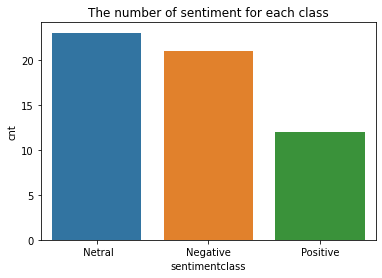

In [69]:
# visualization
# barchart
#make a barchar
ax = sns.barplot(x= 'sentimentclass', y='cnt', data=chart)
ax = ax.set_title('The number of sentiment for each class') 

(-1.1211908496545833,
 1.3231773628275059,
 -1.1205034542784167,
 1.1272210833670775)

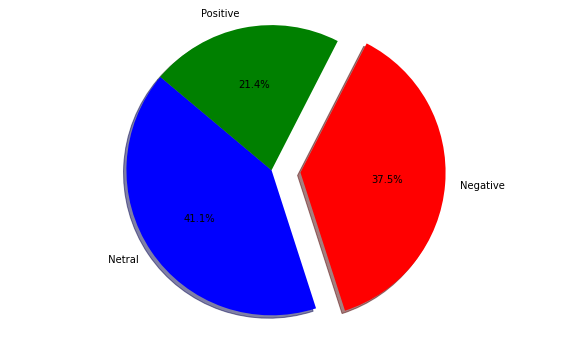

In [70]:
# pie chart
colors = [ 'blue','red','green']
explode = (0, 0.2, 0)  # explode 1st slice
# Plot
figure = plt.figure(figsize= (10,6))
plt.pie(chart['cnt'], explode=explode, labels=chart['sentimentclass'], colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')

In [71]:
#text = happy.Description
#make a wordcloud 
def create_word_cloud(string):
    cloud = WordCloud(background_color = "white", max_words = 100, stopwords = set(STOPWORDS)).generate(string)
    plt.imshow(cloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

In [78]:
#define positive and negatif
positive = df.loc[df['sentimentclass']=='Positive' ]
negative  = df.loc[df['sentimentclass']=='Negative' ]
positive.head(20)

,Tweets,sentiment,sentimentclass
7,(1) Watching a rerun of the #first 2016 #presi...,0.250000,Positive
8,https://t.co/ySA4U7drZ0\n\nWish his policies w...,0.268182,Positive
12,RT @tabitha_gb: “My goal was just to be fair a...,0.533333,Positive
13,RT @tabitha_gb: “My goal was just to be fair a...,0.533333,Positive
14,“My goal was just to be fair and to let them b...,0.533333,Positive
15,Kristen says she had a gut feeling that the se...,0.083333,Positive
23,RT @Dncdesantis: My prediction on tonight's #P...,0.100000,Positive
45,RT @SpencerKarter: More of #DonaldTrump's #Dam...,0.625000,Positive
46,RT @SpencerKarter: More of #DonaldTrump's #Dam...,0.625000,Positive
47,Holy #BernieSanders totally steals the thunde...,0.025000,Positive


In [79]:
#define positive and negatif
positive = df.loc[df['sentimentclass']=='Positive' ]
negative  = df.loc[df['sentimentclass']=='Negative' ]
negative.head(20)

,Tweets,sentiment,sentimentclass
2,RT @Matthewcogdeill: Speaking of what Joe Bide...,-0.450000,Negative
6,RT @jksmith06: @realDonaldTrump @POTUS #Presid...,-0.300000,Negative
19,RT @TheRochaSays: I mean basically... #Preside...,-0.312500,Negative
20,RT @Matthewcogdeill: Speaking of what Joe Bide...,-0.450000,Negative
21,RT @Matthewcogdeill: Speaking of what Joe Bide...,-0.450000,Negative
22,RT @Matthewcogdeill: Speaking of what Joe Bide...,-0.450000,Negative
26,RT @RandPaul: Is this the part where @JoeBiden...,-0.166667,Negative
28,RT @Matthewcogdeill: Speaking of what Joe Bide...,-0.450000,Negative
29,RT @Matthewcogdeill: Speaking of what Joe Bide...,-0.450000,Negative
30,RT @Matthewcogdeill: Speaking of what Joe Bide...,-0.450000,Negative


In [73]:
all_positive = "".join(positive['Tweets'].values)
all_negative = "".join(negative['Tweets'].values)
# positive[['Tweets']].values

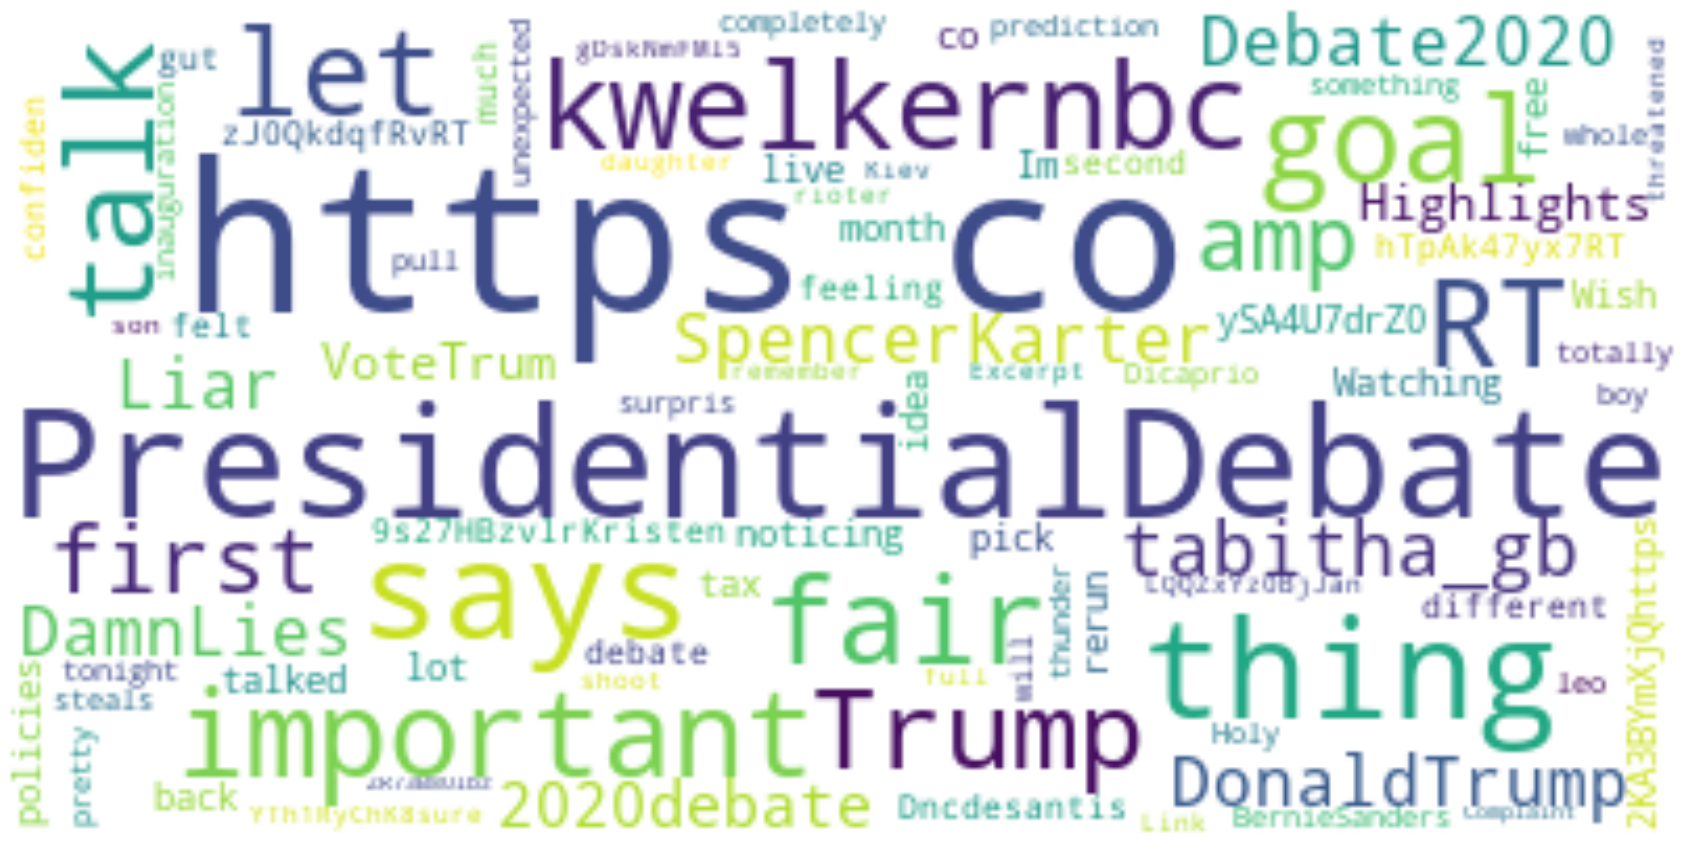

In [80]:
#word cloud
#positive
plt.figure(figsize=(30,30))
create_word_cloud(all_positive)

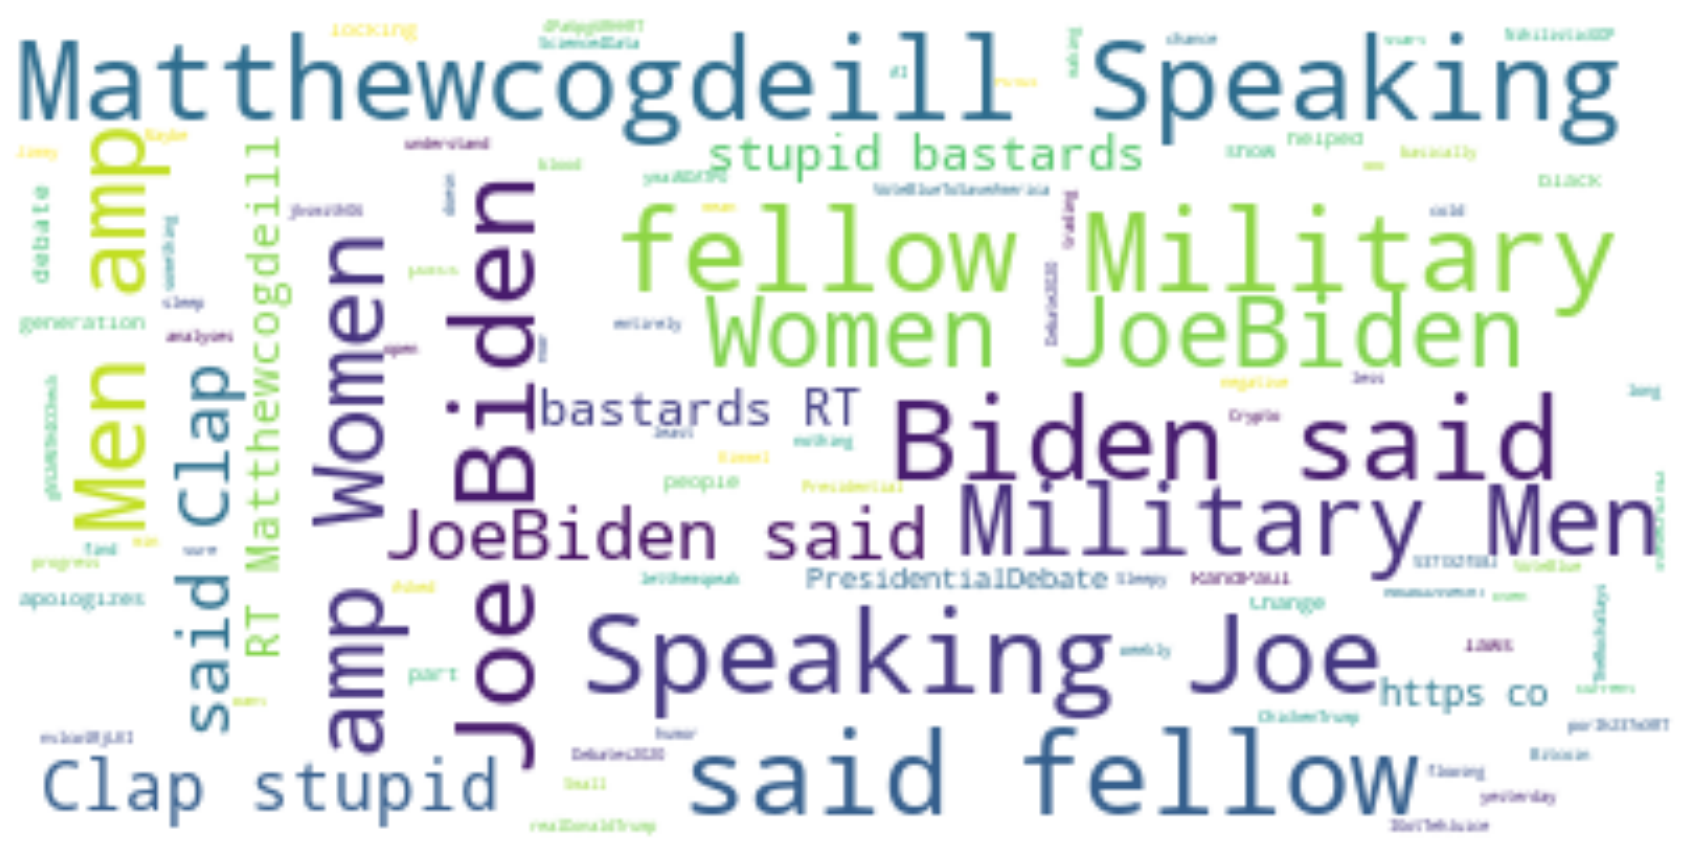

In [81]:
#negative
plt.figure(figsize=(30,30))
create_word_cloud(all_negative)